In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import umap
from sklearn.cluster import KMeans
import geopandas as gpd

## Loading in and merging all of the data sets
Each data file is from a different year, and I'll be using New York State Department of Health data spanning from 2018-2021

In [84]:
#2021 Data

df1 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021 (1).csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/118251767.py:3: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021 (1).csv')


In [85]:
# Only keeping patients who are uninsured for the purposes of our project

values_to_keep = ['Self-Pay']

df1 = df1[df1['Payment Typology 1'].isin(values_to_keep)]
df1['Payment Typology 1'].value_counts()

Self-Pay    27107
Name: Payment Typology 1, dtype: int64

In [86]:
#2020 Data

df2 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/4131979403.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv')


In [87]:
df2 = df2[df2['Payment Typology 1'].isin(values_to_keep)]
df2['Payment Typology 1'].value_counts()

Self-Pay    33343
Name: Payment Typology 1, dtype: int64

In [88]:
df = pd.concat([df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60450 entries, 41 to 2052352
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital Service Area                60053 non-null  object 
 1   Hospital County                      60053 non-null  object 
 2   Operating Certificate Number         60041 non-null  float64
 3   Permanent Facility Id                60053 non-null  float64
 4   Facility Name                        60450 non-null  object 
 5   Age Group                            60450 non-null  object 
 6   Zip Code - 3 digits                  58139 non-null  object 
 7   Gender                               60450 non-null  object 
 8   Race                                 60450 non-null  object 
 9   Ethnicity                            60450 non-null  object 
 10  Length of Stay                       60450 non-null  object 
 11  Type of Admission        

In [89]:
#2019 Data

df3 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/705313734.py:3: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv')


In [90]:
df3 = df3[df3['Payment Typology 1'].isin(values_to_keep)]
df3['Payment Typology 1'].value_counts()

Self-Pay    56108
Name: Payment Typology 1, dtype: int64

In [91]:
df = pd.concat([df, df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116558 entries, 41 to 2339447
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                115803 non-null  object 
 1   Hospital County                      115803 non-null  object 
 2   Operating Certificate Number         115791 non-null  float64
 3   Permanent Facility Id                115808 non-null  float64
 4   Facility Name                        116558 non-null  object 
 5   Age Group                            116558 non-null  object 
 6   Zip Code - 3 digits                  112426 non-null  object 
 7   Gender                               116558 non-null  object 
 8   Race                                 116558 non-null  object 
 9   Ethnicity                            116558 non-null  object 
 10  Length of Stay                       116558 non-null  object 
 11  Type of Adm

In [92]:
#2018 Data

df4 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/621550119.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv')


In [93]:
df4 = df4[df4['Payment Typology 1'].isin(values_to_keep)]
df4['Payment Typology 1'].value_counts()

Self-Pay    38299
Name: Payment Typology 1, dtype: int64

In [94]:
df = pd.concat([df, df4])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154857 entries, 41 to 2352623
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                153856 non-null  object 
 1   Hospital County                      153856 non-null  object 
 2   Operating Certificate Number         153844 non-null  float64
 3   Permanent Facility Id                153862 non-null  float64
 4   Facility Name                        154857 non-null  object 
 5   Age Group                            154857 non-null  object 
 6   Zip Code - 3 digits                  149292 non-null  object 
 7   Gender                               154857 non-null  object 
 8   Race                                 154857 non-null  object 
 9   Ethnicity                            154857 non-null  object 
 10  Length of Stay                       154857 non-null  object 
 11  Type of Adm

#### Updating the Length of Stay column to numeric and making sure our target variable "Total Charges" has no zeros

In [95]:
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')

In [96]:
df = df[df['Total Charges'] != 0]

### Dropping NaNs and some unnecessary columns

In [97]:
df.dropna(subset=['CCSR Procedure Code'], inplace=True)

In [98]:
columns_to_drop_1 = ['Operating Certificate Number', 'Permanent Facility Id'
                     , 'Zip Code - 3 digits', 'CCSR Diagnosis Description'
                     , 'CCSR Procedure Description', 'APR DRG Description'
                     , 'APR MDC Description', 'APR Severity of Illness Description'
                     , 'Payment Typology 2', 'Payment Typology 3', 'Birth Weight'
                    , 'Total Costs']
df.drop(columns_to_drop_1, axis=1, inplace=True)

In [99]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99407 entries, 41 to 2352623
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hospital Service Area             99407 non-null  object 
 1   Hospital County                   99407 non-null  object 
 2   Facility Name                     99407 non-null  object 
 3   Age Group                         99407 non-null  object 
 4   Gender                            99407 non-null  object 
 5   Race                              99407 non-null  object 
 6   Ethnicity                         99407 non-null  object 
 7   Length of Stay                    99407 non-null  float64
 8   Type of Admission                 99407 non-null  object 
 9   Patient Disposition               99407 non-null  object 
 10  Discharge Year                    99407 non-null  int64  
 11  CCSR Diagnosis Code               99407 non-null  object 
 12  C

#### I'm most interested in looking at the average patient so I'm reducing the "Length of Stay" variable to 1-2 days, and I'm filtering the "Severity of Illness" variable to only include people with "minor" illness. This is the majority of hospital patients.

In [100]:
filtered_df = df[df['Length of Stay'] <= 2]

In [101]:
filtered_df['APR Severity of Illness Code'].value_counts()

1.0    27811
2.0    15912
3.0     3788
4.0     1372
Name: APR Severity of Illness Code, dtype: int64

In [102]:
filtered_df = filtered_df[filtered_df['APR Severity of Illness Code'] < 2]

#### Removing any outliers (more than 3 standard deviations) from the target variable

In [103]:
filtered_df['Total Charges'].describe()

count     27811.000000
mean      18300.558508
std       20449.813000
min         302.710000
25%        4620.625000
50%       12183.980000
75%       24847.000000
max      503395.160000
Name: Total Charges, dtype: float64

In [104]:
filtered_df = filtered_df[filtered_df['Total Charges'] < 80000]

#### The Emergency Department Indicator column has mixed data, so cleaning that up

In [105]:
filtered_df['Emergency Department Indicator'].value_counts()

False    10875
N         7423
True      5759
Y         3282
Name: Emergency Department Indicator, dtype: int64

In [106]:
filtered_df['Emergency Department Indicator'] = filtered_df['Emergency Department Indicator'].replace({True: 'Y', False: 'N'})

In [107]:
filtered_df['Emergency Department Indicator'].value_counts()

N    18298
Y     9041
Name: Emergency Department Indicator, dtype: int64

#### Saving this cleaned dataset to use for future notebooks

In [108]:
output_file_path = '/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/filtered_data.csv'
filtered_df.to_csv(output_file_path, index=False)

#### Finally, performing some EDA to get a good sense of our data

In [109]:
filtered_df.describe()

,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges
count,27339.000000,27339.000000,27339.000000,27339.000000,27339.0,27339.000000
mean,1.540217,2019.313984,482.404002,11.726398,1.0,16651.729836
std,0.498389,1.033755,201.294752,4.737322,0.0,15420.875073
min,1.000000,2018.000000,20.000000,1.000000,1.0,302.710000
25%,1.000000,2018.000000,302.000000,8.000000,1.0,4549.995000
50%,2.000000,2019.000000,560.000000,14.000000,1.0,11864.230000
75%,2.000000,2020.000000,640.000000,15.000000,1.0,24178.000000
max,2.000000,2021.000000,952.000000,25.000000,1.0,79969.300000


/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/2419307324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


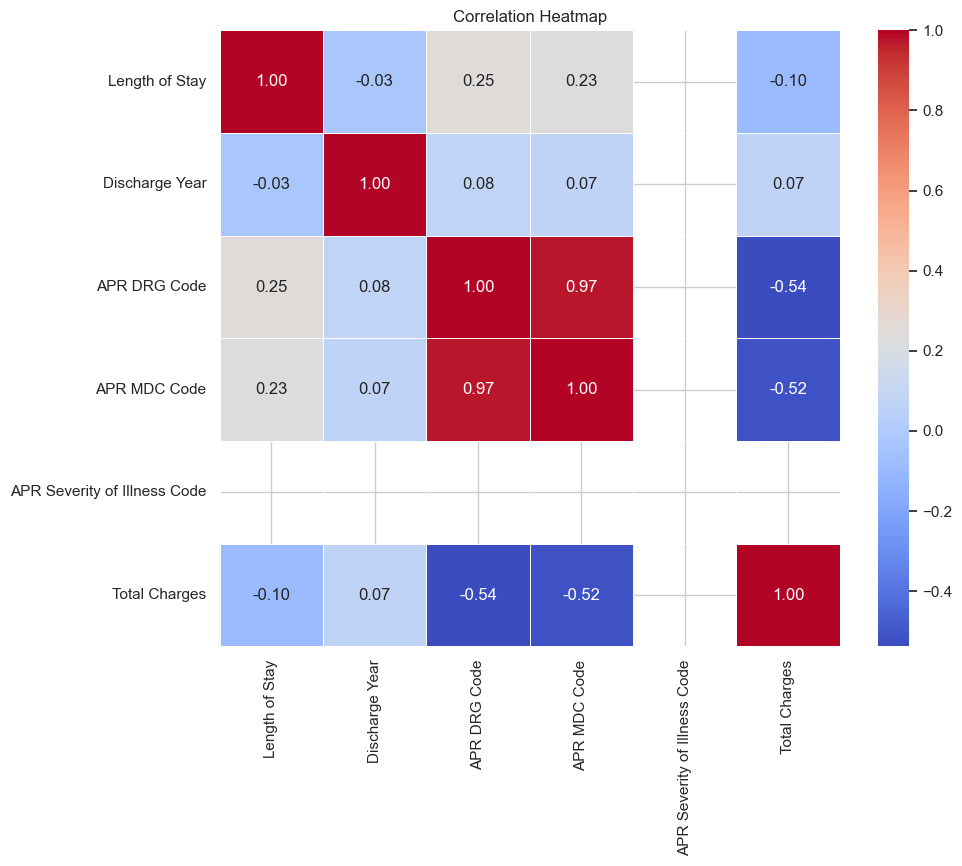

In [153]:
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(10, 8))  # Optional: adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

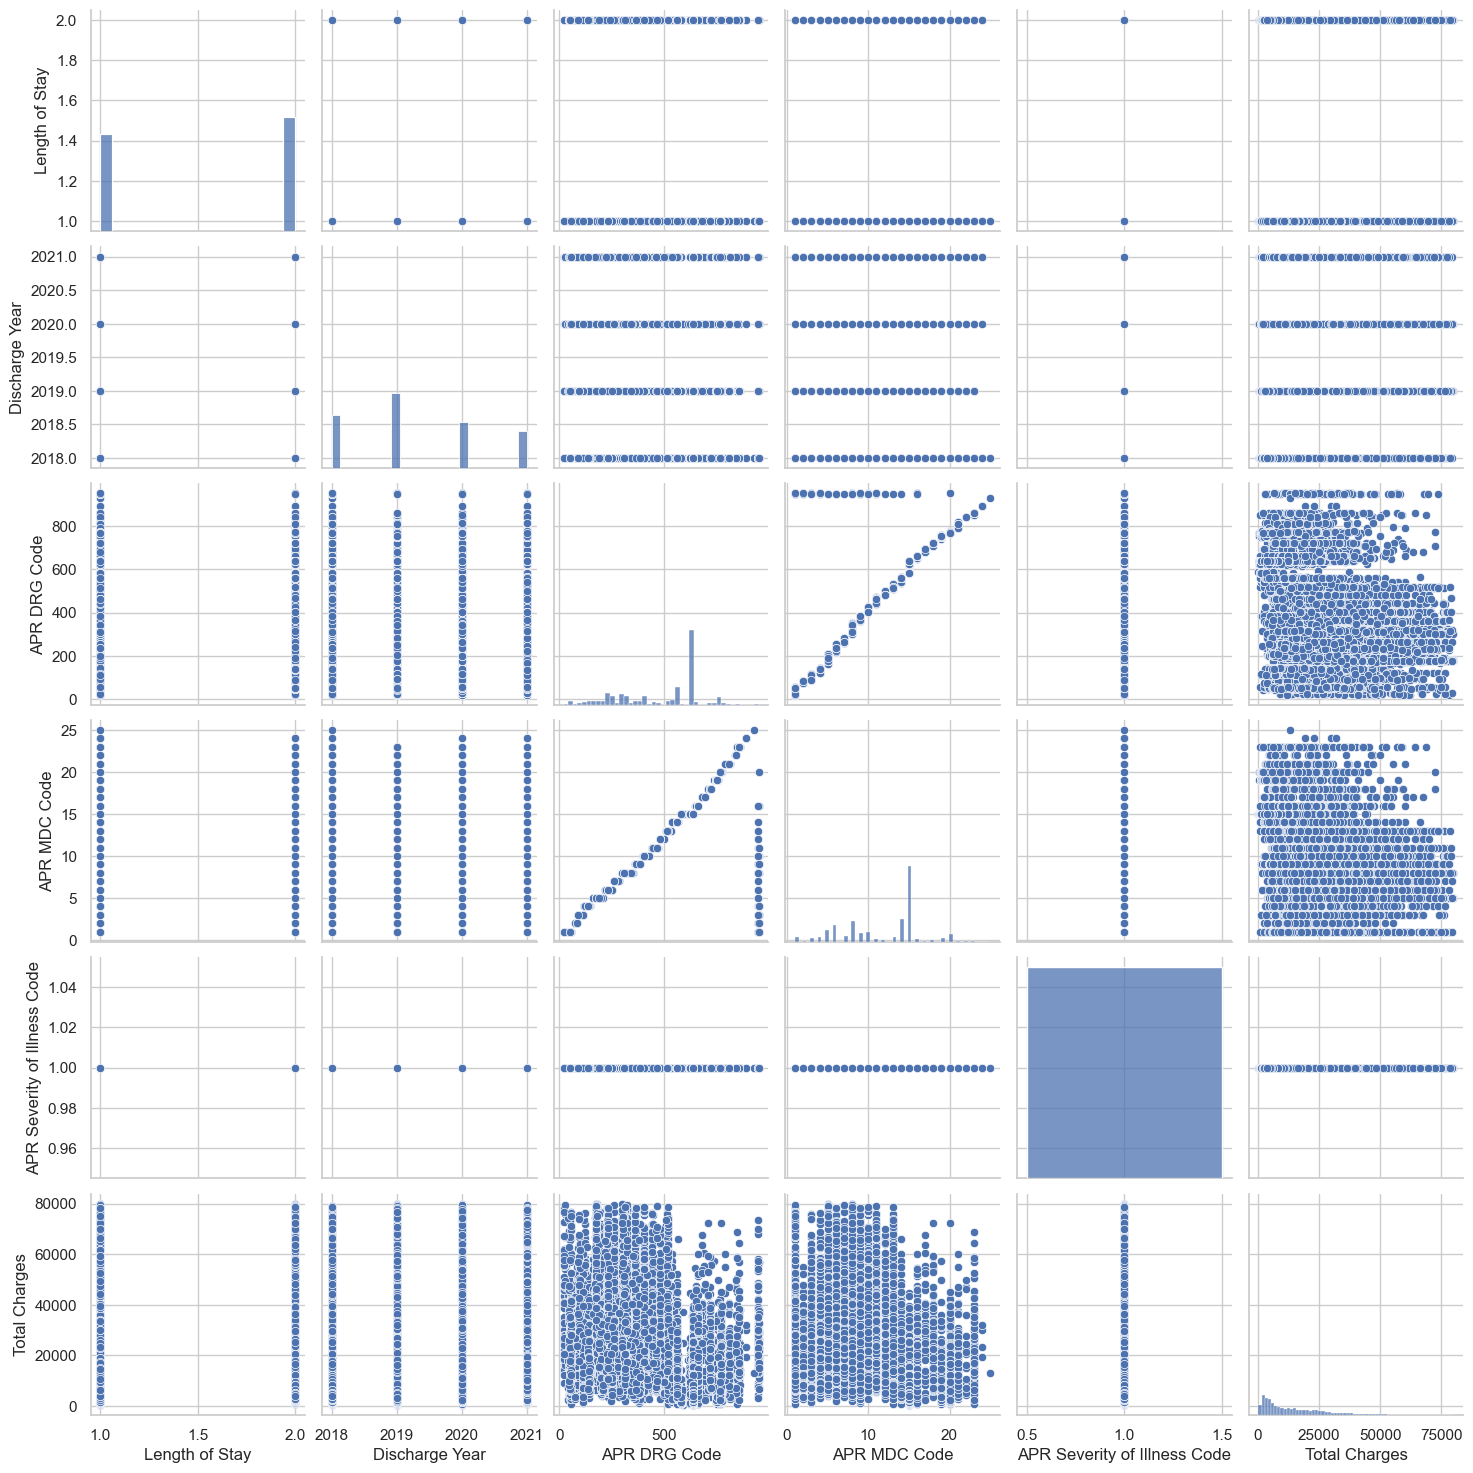

In [110]:
sns.pairplot(filtered_df)
plt.show()

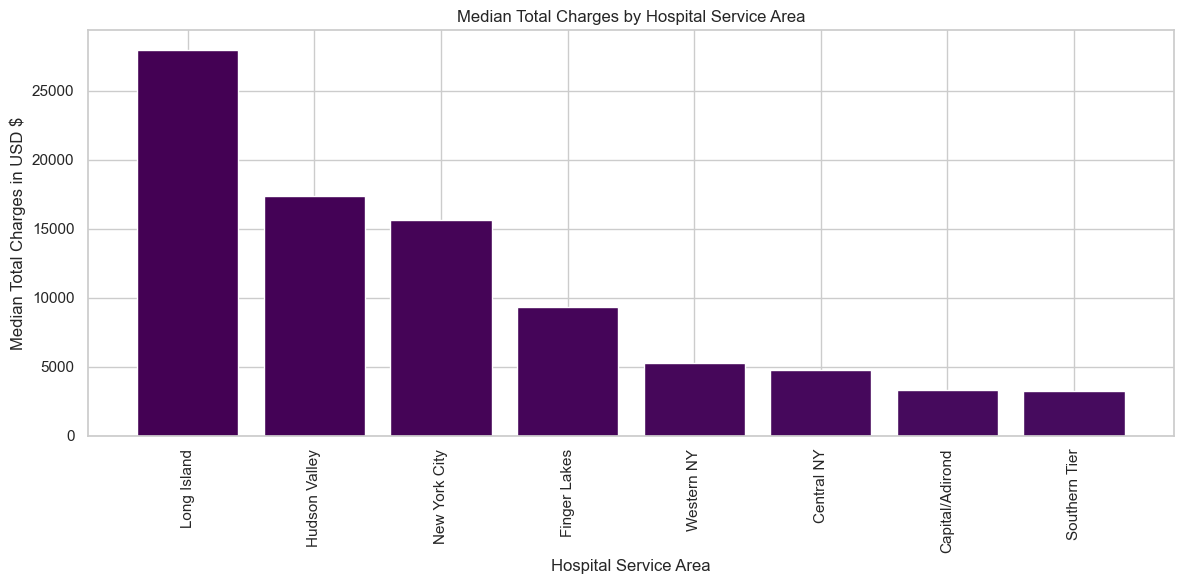

In [154]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_area = filtered_df.groupby('Hospital Service Area')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_area = median_charges_by_area.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_area['Hospital Service Area'], median_charges_by_area['Total Charges'], color=colormap(range(len(median_charges_by_area))))
plt.xticks(rotation=90)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('Hospital Service Area')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Hospital Service Area')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels
plt.show()

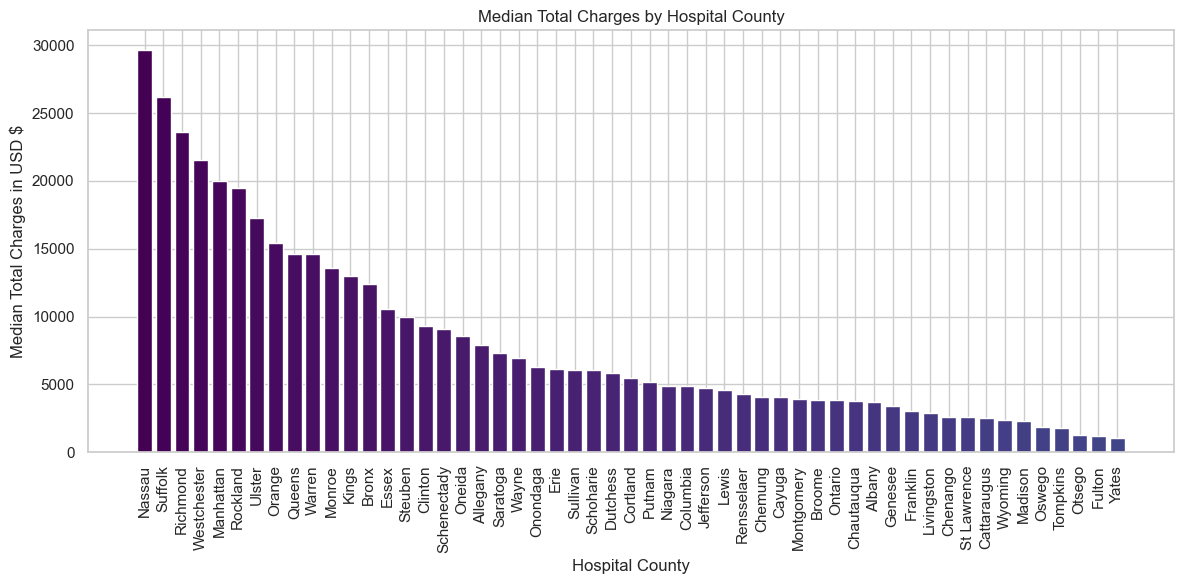

In [155]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_county = filtered_df.groupby('Hospital County')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_county = median_charges_by_county.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_county['Hospital County'], median_charges_by_county['Total Charges'], color=colormap(range(len(median_charges_by_county))))
plt.xticks(rotation=90)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('Hospital County')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Hospital County')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels
plt.show()

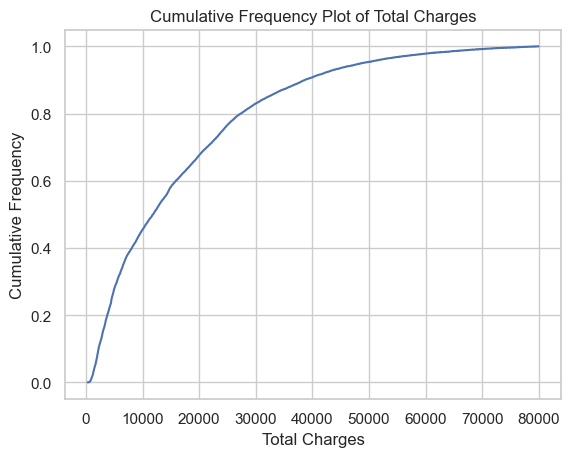

In [113]:
total_charges_sorted = np.sort(filtered_df['Total Charges'])
cumulative_frequency = np.arange(1, len(total_charges_sorted) + 1) / len(total_charges_sorted)

# Create the cumulative frequency plot
plt.step(total_charges_sorted, cumulative_frequency, where='post')

# Customize the plot (optional)
plt.xlabel('Total Charges')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot of Total Charges')

# Show the plot
plt.show()

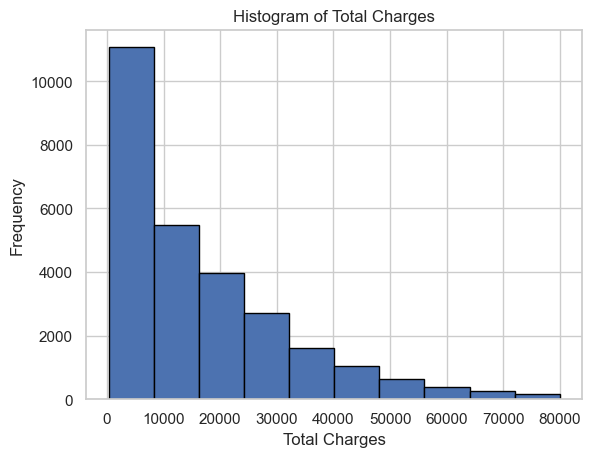

In [114]:
plt.hist(filtered_df['Total Charges'], bins=10, edgecolor='black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Charges')
plt.show()

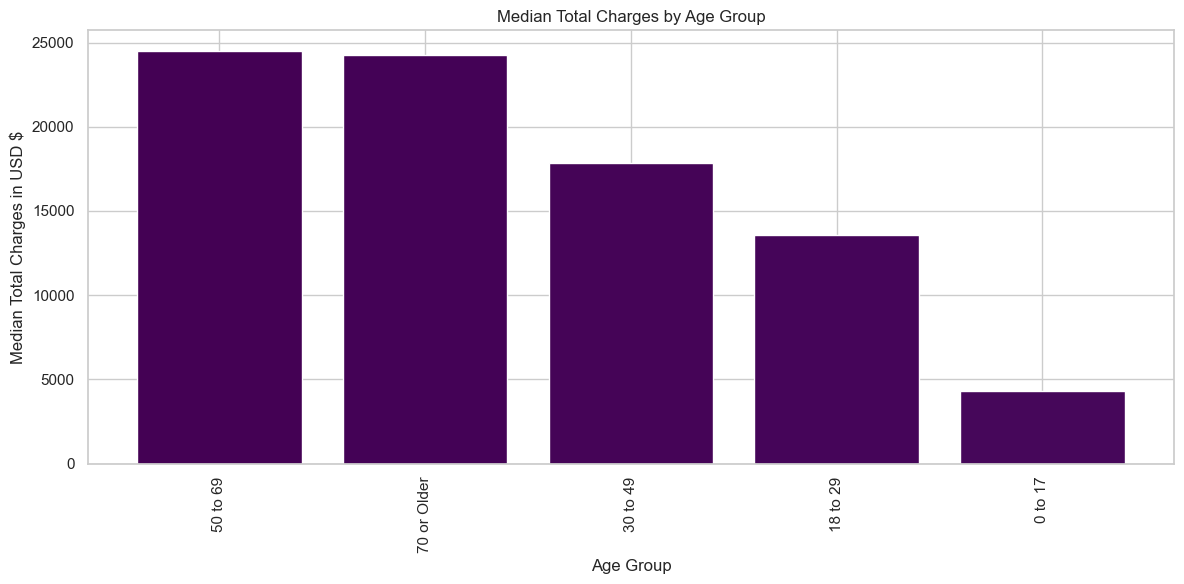

In [156]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_age = filtered_df.groupby('Age Group')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_age = median_charges_by_age.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_age['Age Group'], median_charges_by_age['Total Charges'], color=colormap(range(len(median_charges_by_age))))
plt.xticks(rotation=90)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('Age Group')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Age Group')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels
plt.show()

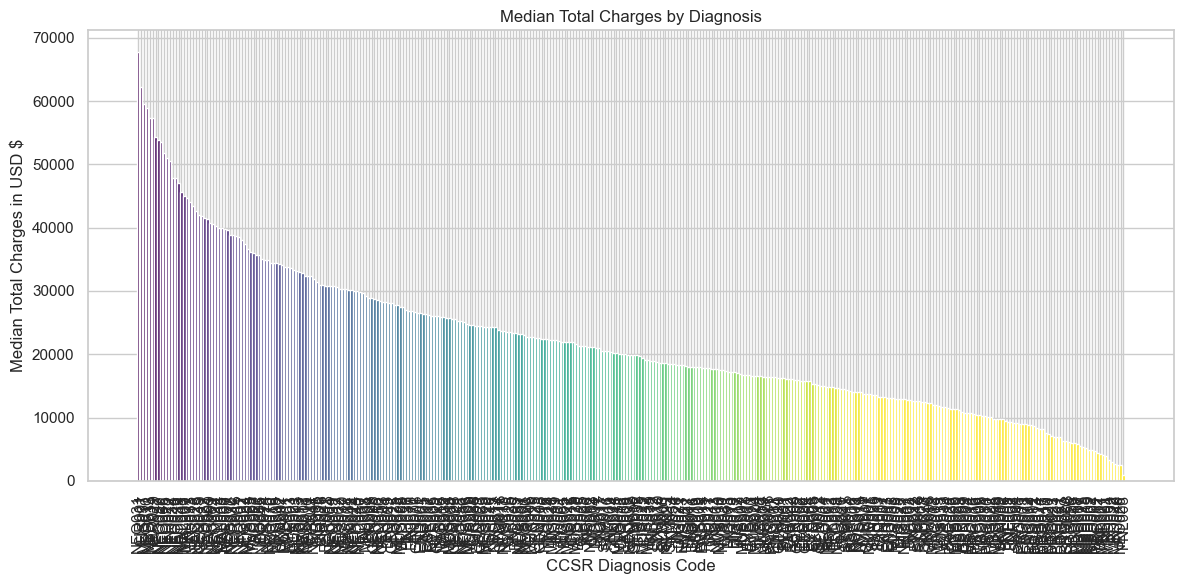

In [157]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_diagnosis = filtered_df.groupby('CCSR Diagnosis Code')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_diagnosis = median_charges_by_diagnosis.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_diagnosis['CCSR Diagnosis Code'], median_charges_by_diagnosis['Total Charges'], color=colormap(range(len(median_charges_by_diagnosis))))
plt.xticks(rotation=90)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('CCSR Diagnosis Code')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Diagnosis')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels
plt.show()

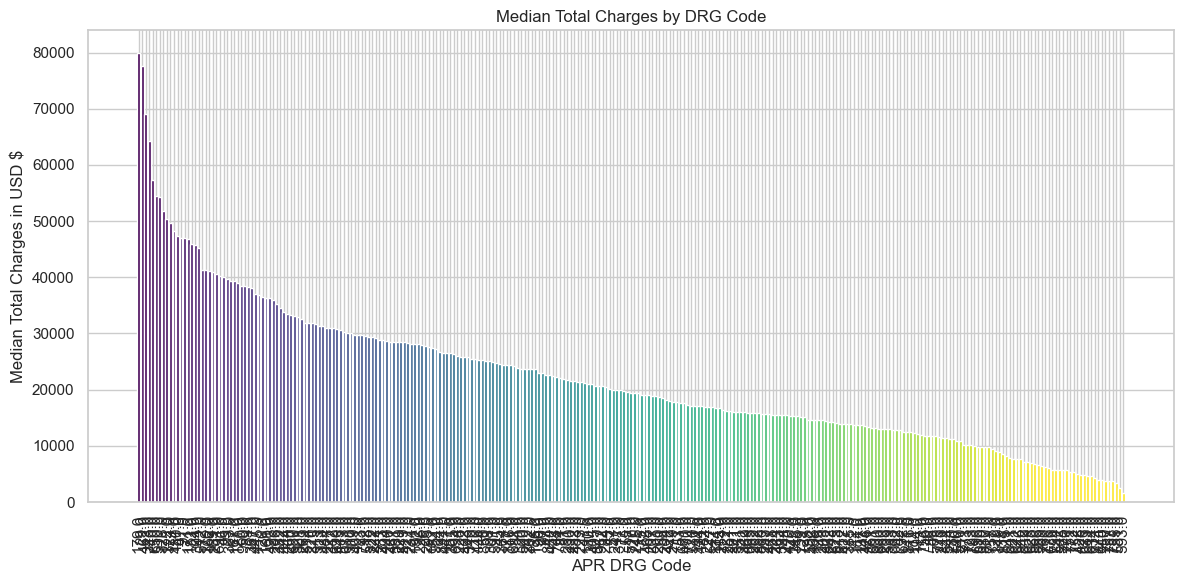

In [158]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_drg = filtered_df.groupby('APR DRG Code')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_drg = median_charges_by_drg.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_drg['APR DRG Code'].astype(str), median_charges_by_drg['Total Charges'], color= colormap(range(len(median_charges_by_diagnosis))))
plt.xticks(rotation=90)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('APR DRG Code')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by DRG Code')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels
plt.show()

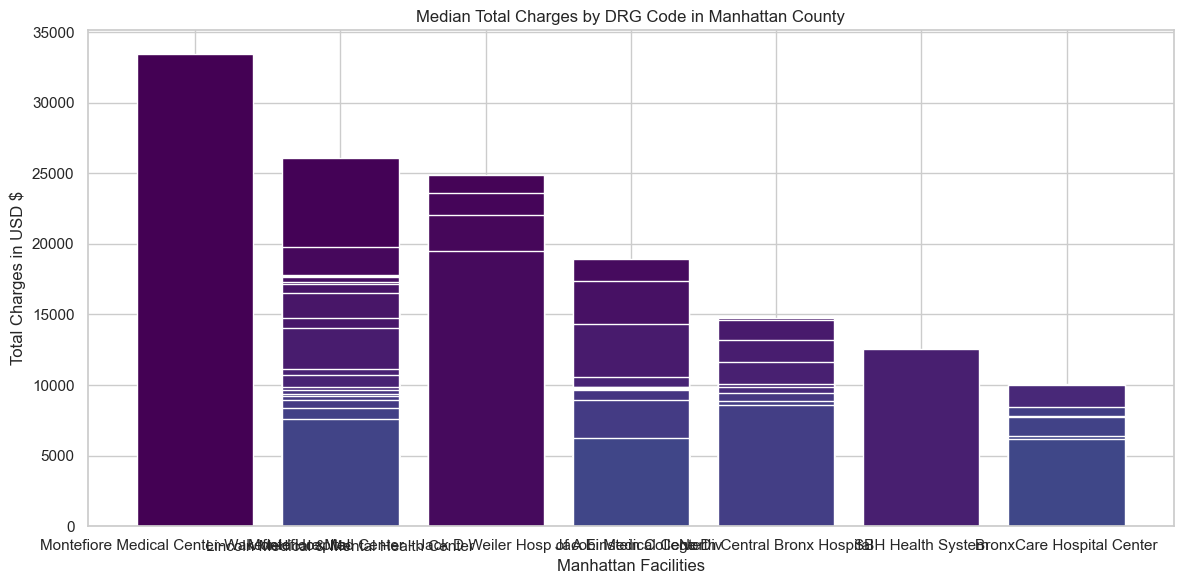

In [170]:
# Filter the data to include only hospitals in Manhattan County and the specific APR DRG Code
manhattan_data = filtered_df[(filtered_df['Hospital County'] == 'Bronx') & (filtered_df['APR DRG Code'] == 560)]

# Pivot the data to create a table with "APR DRG Code" as rows and "Hospital Service Area" as columns
manhattan_data = manhattan_data.sort_values('Total Charges', ascending=False)


# Create the heatmap using seaborn's heatmap function
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(manhattan_data['Facility Name'], manhattan_data['Total Charges'], color= colormap(range(len(manhattan_data))))
plt.xlabel('Manhattan Facilities')
plt.ylabel('Total Charges in USD $')
plt.title('Median Total Charges by DRG Code in Manhattan County')
plt.tight_layout()
plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/972043267.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(median_charges_by_service_area['Hospital Service Area'], ha='right')


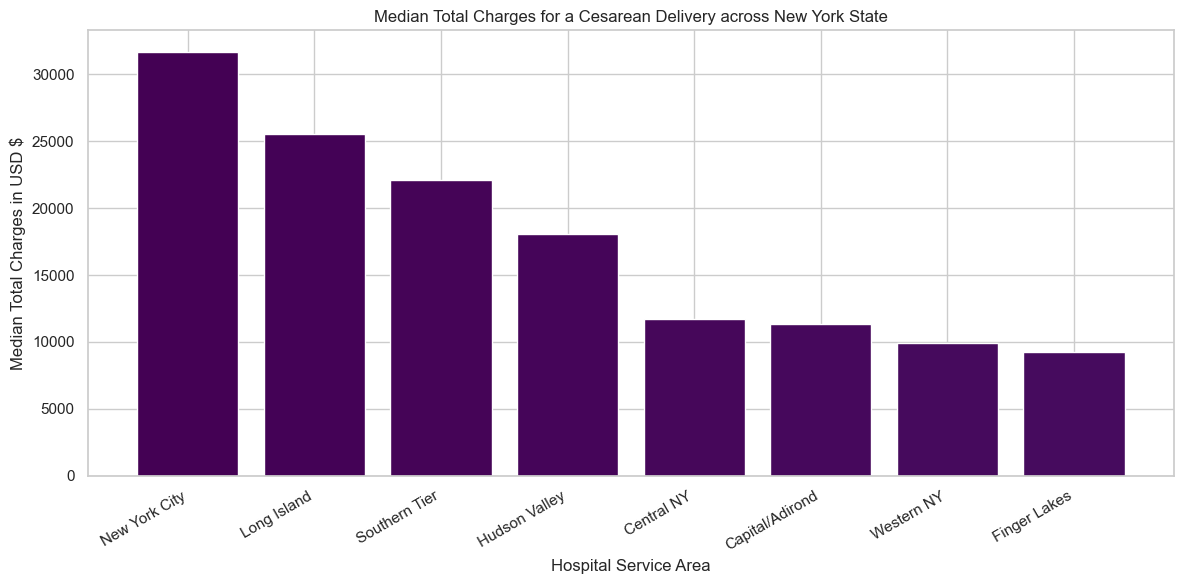

In [209]:
# Filter the data to include only hospitals in Manhattan County and APR DRG Code 560
newyork_data = filtered_df[(filtered_df['APR DRG Code'] == 540)]

# Group the filtered data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_service_area = newyork_data.groupby('Hospital Service Area')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_service_area = median_charges_by_service_area.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_service_area['Hospital Service Area'], median_charges_by_service_area['Total Charges'], color=colormap(range(len(median_charges_by_service_area))))
plt.xticks(rotation = 30)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('Hospital Service Area')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges for a Cesarean Delivery across New York State')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels

plt.gca().set_xticklabels(median_charges_by_service_area['Hospital Service Area'], ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/2771330457.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(median_charges_by_facility['Facility Name'], ha='right')


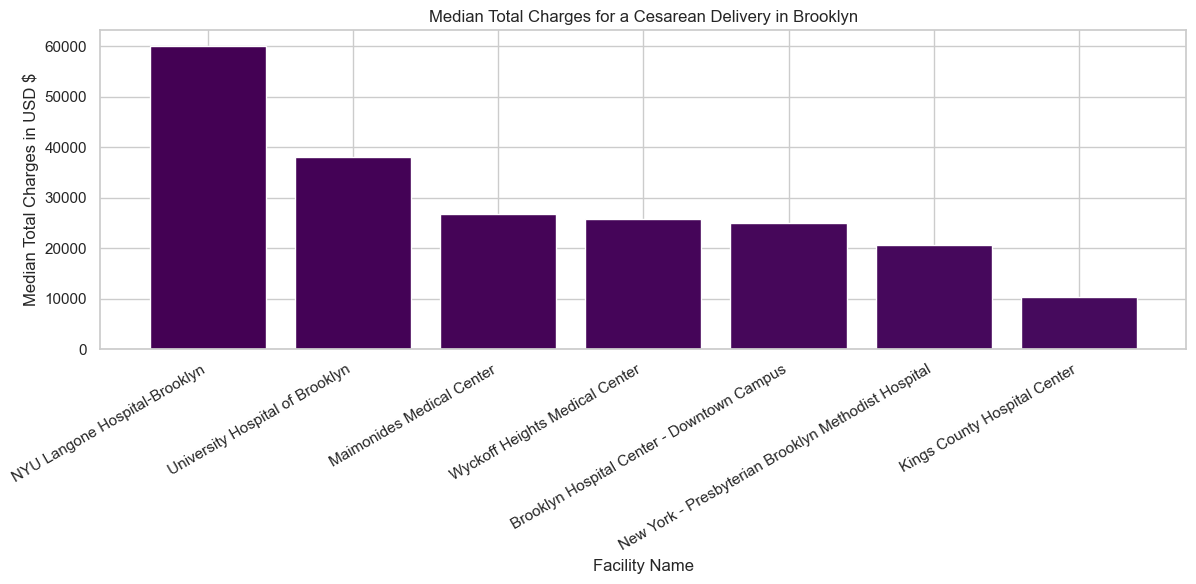

In [193]:
# Filter the data to include only hospitals in Manhattan County and APR DRG Code 560
brooklyn_data = filtered_df[(filtered_df['Hospital County'] == 'Kings') & (filtered_df['APR DRG Code'] == 540)]

# Group the filtered data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_facility = brooklyn_data.groupby('Facility Name')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_facility = median_charges_by_facility.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_facility['Facility Name'], median_charges_by_facility['Total Charges'], color=colormap(range(len(median_charges_by_facility))))
plt.xticks(rotation = 30)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('Facility Name')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges for a Cesarean Delivery in Brooklyn')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels

plt.gca().set_xticklabels(median_charges_by_facility['Facility Name'], ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/1372586312.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(median_charges_by_facility['Facility Name'], ha='right')


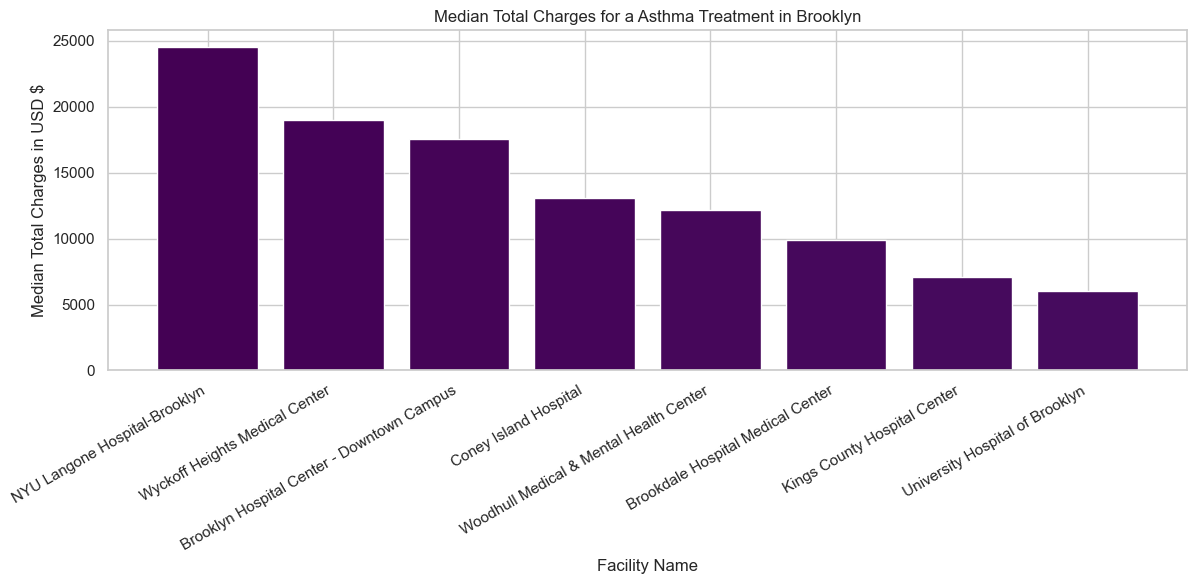

In [207]:
# Filter the data to include only hospitals in Manhattan County and APR DRG Code 560
brooklyn_data = filtered_df[(filtered_df['Hospital County'] == 'Kings') & (filtered_df['APR DRG Code'] == 141)]

# Group the filtered data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_facility = brooklyn_data.groupby('Facility Name')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_facility = median_charges_by_facility.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
plt.bar(median_charges_by_facility['Facility Name'], median_charges_by_facility['Total Charges'], color=colormap(range(len(median_charges_by_facility))))
plt.xticks(rotation = 30)  # Optional: rotate the x-axis labels for better readability
plt.xlabel('Facility Name')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges for a Asthma Treatment in Brooklyn')
plt.tight_layout()  # Optional: adjust spacing to prevent clipping of labels

plt.gca().set_xticklabels(median_charges_by_facility['Facility Name'], ha='right')

plt.show()

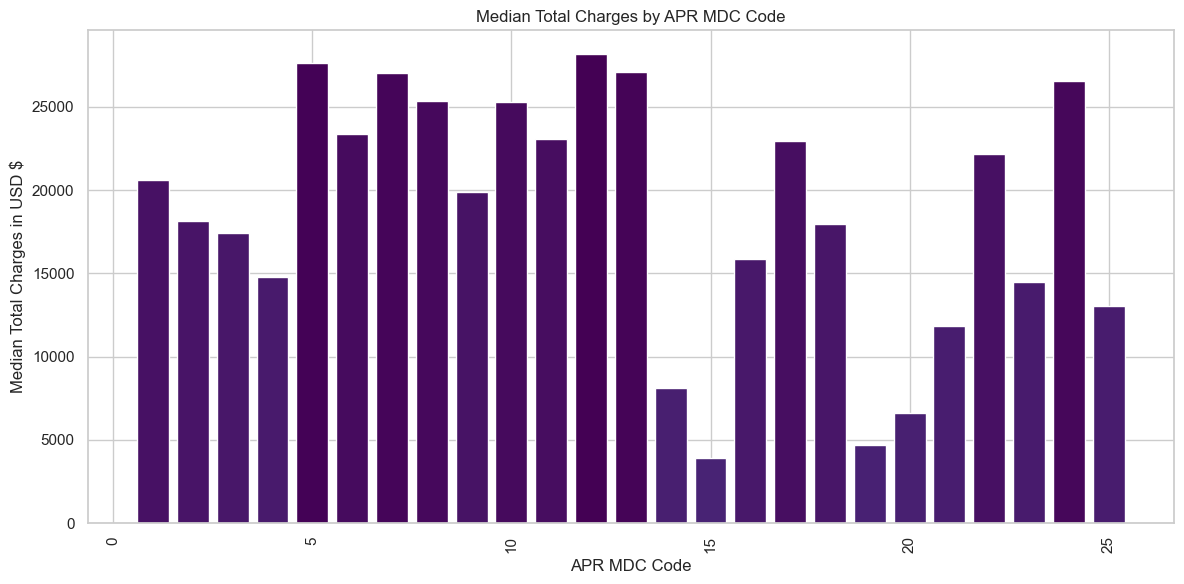

In [159]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_mdc = filtered_df.groupby('APR MDC Code')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_mdc = median_charges_by_mdc.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_mdc['APR MDC Code'], median_charges_by_mdc['Total Charges'], color=colormap(range(len(median_charges_by_mdc))))
plt.xticks(rotation=90)
plt.xlabel('APR MDC Code')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by APR MDC Code')
plt.tight_layout() 
plt.show()

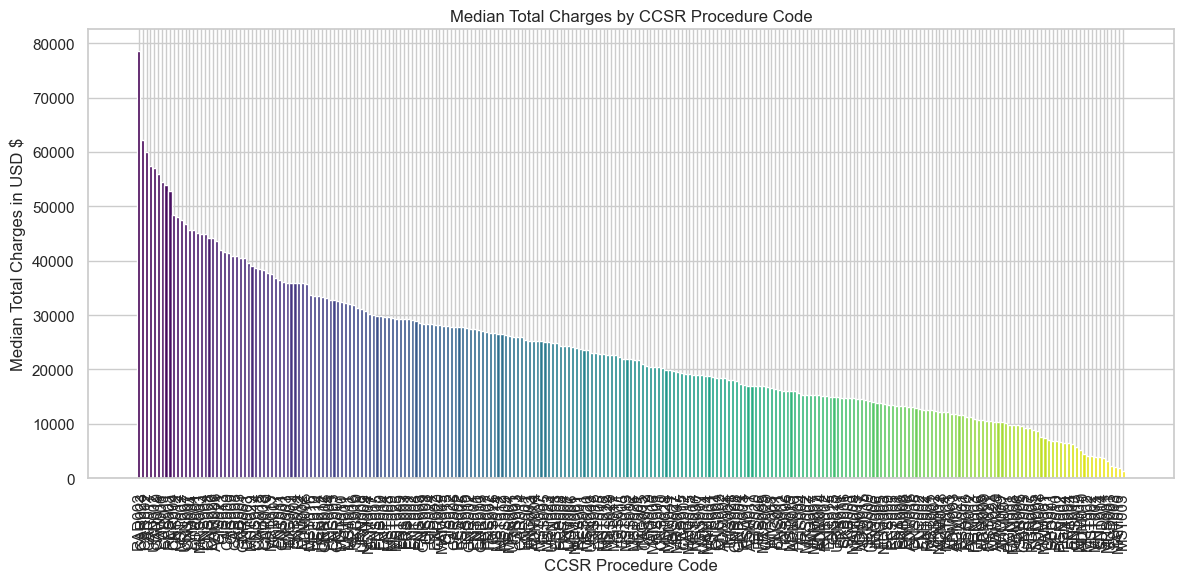

In [146]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_procedure = filtered_df.groupby('CCSR Procedure Code')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_procedure = median_charges_by_procedure.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_procedure['CCSR Procedure Code'], median_charges_by_procedure['Total Charges'], color=colormap(range(len(median_charges_by_procedure))))
plt.xticks(rotation=90)
plt.xlabel('CCSR Procedure Code')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by CCSR Procedure Code')
plt.tight_layout() 
plt.show()

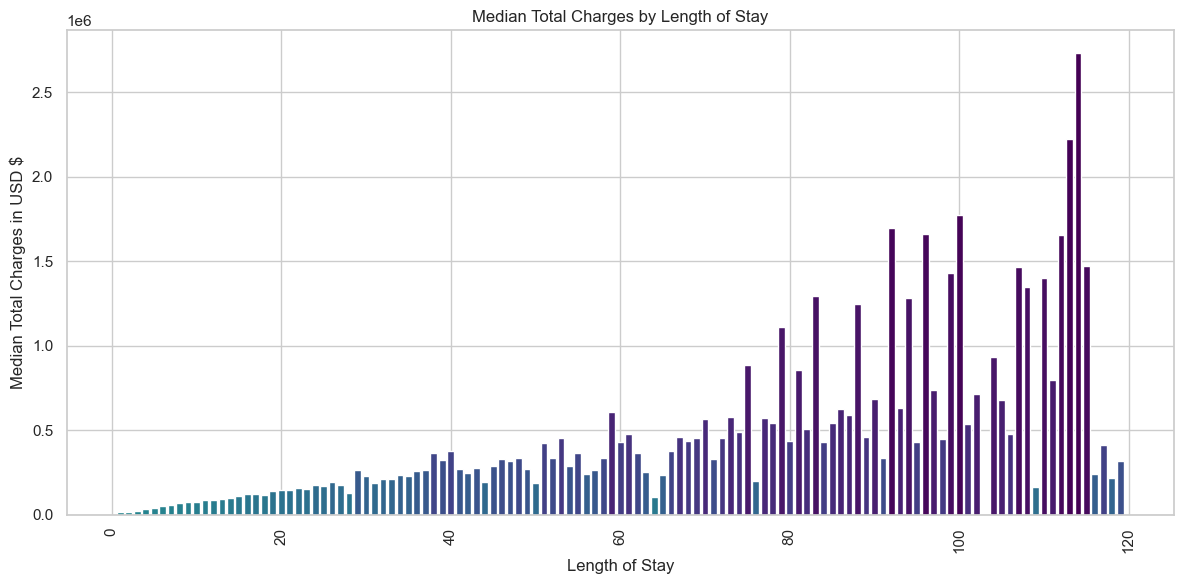

In [148]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_los = df.groupby('Length of Stay')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_los = median_charges_by_los.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_los['Length of Stay'], median_charges_by_los['Total Charges'], color=colormap(range(len(median_charges_by_los))))
plt.xticks(rotation=90)
plt.xlabel('Length of Stay')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Length of Stay')
plt.tight_layout() 
plt.show()

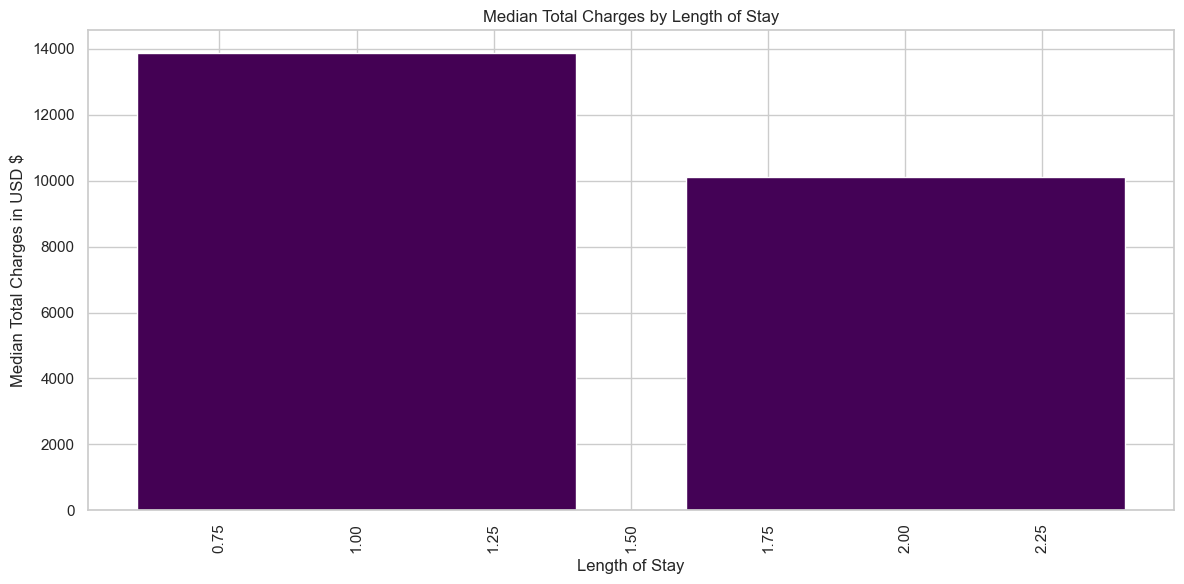

In [149]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_los = filtered_df.groupby('Length of Stay')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_los = median_charges_by_los.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_los['Length of Stay'], median_charges_by_los['Total Charges'], color=colormap(range(len(median_charges_by_los))))
plt.xticks(rotation=90)
plt.xlabel('Length of Stay')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Length of Stay')
plt.tight_layout() 
plt.show()

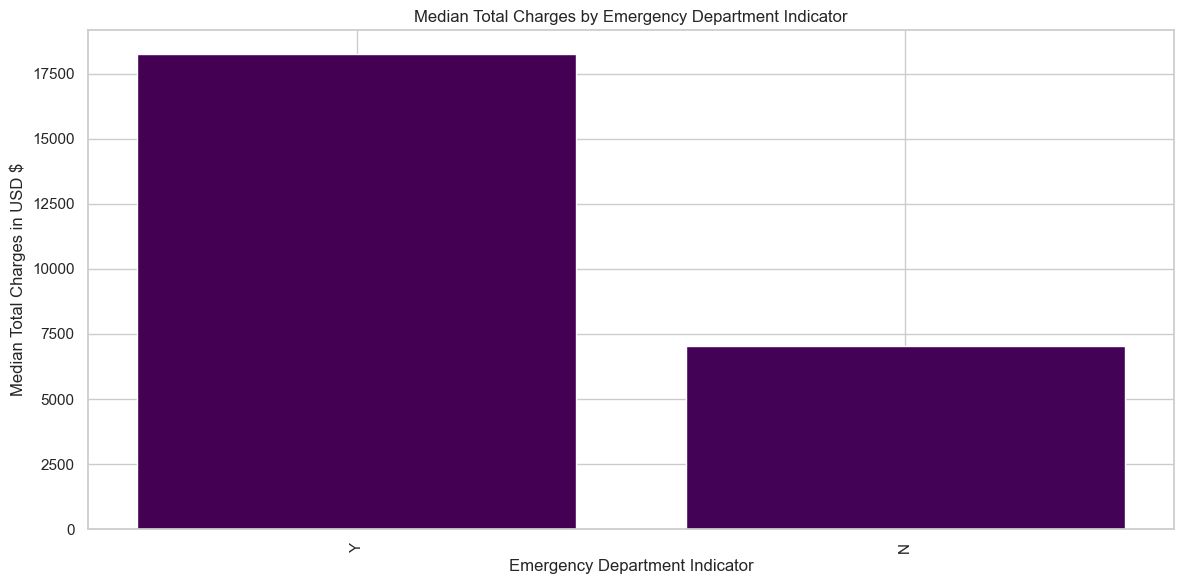

In [150]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_er = filtered_df.groupby('Emergency Department Indicator')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_er = median_charges_by_er.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_er['Emergency Department Indicator'], median_charges_by_er['Total Charges'], color=colormap(range(len(median_charges_by_er))))
plt.xticks(rotation=90)
plt.xlabel('Emergency Department Indicator')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Emergency Department Indicator')
plt.tight_layout() 
plt.show()

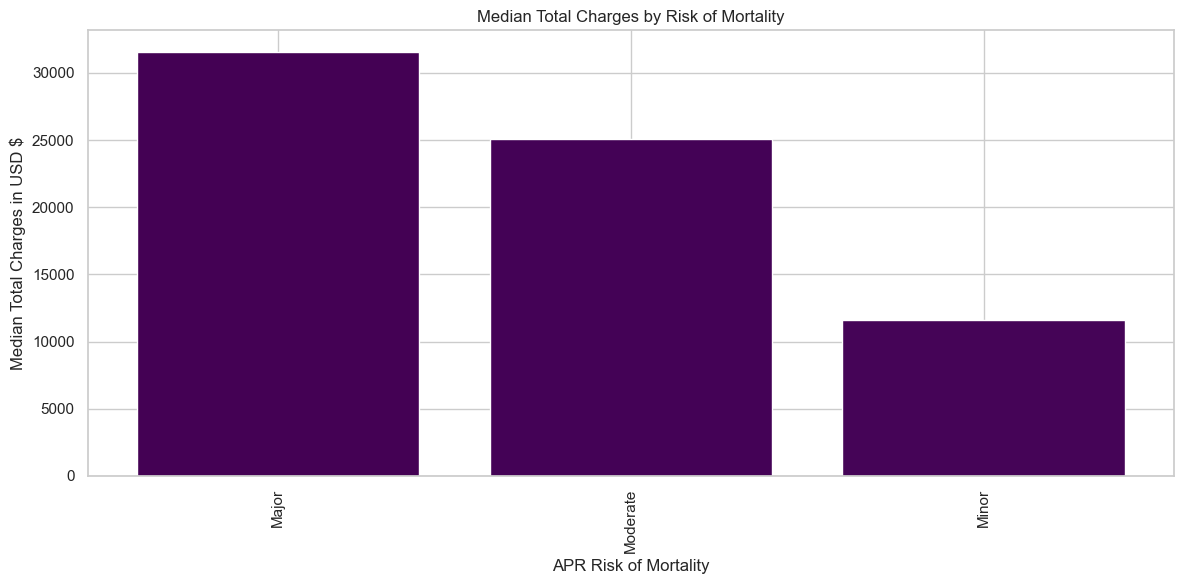

In [151]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_mortality = filtered_df.groupby('APR Risk of Mortality')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_mortality = median_charges_by_mortality.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_mortality['APR Risk of Mortality'], median_charges_by_mortality['Total Charges'], color=colormap(range(len(median_charges_by_mortality))))
plt.xticks(rotation=90)
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Risk of Mortality')
plt.tight_layout() 
plt.show()

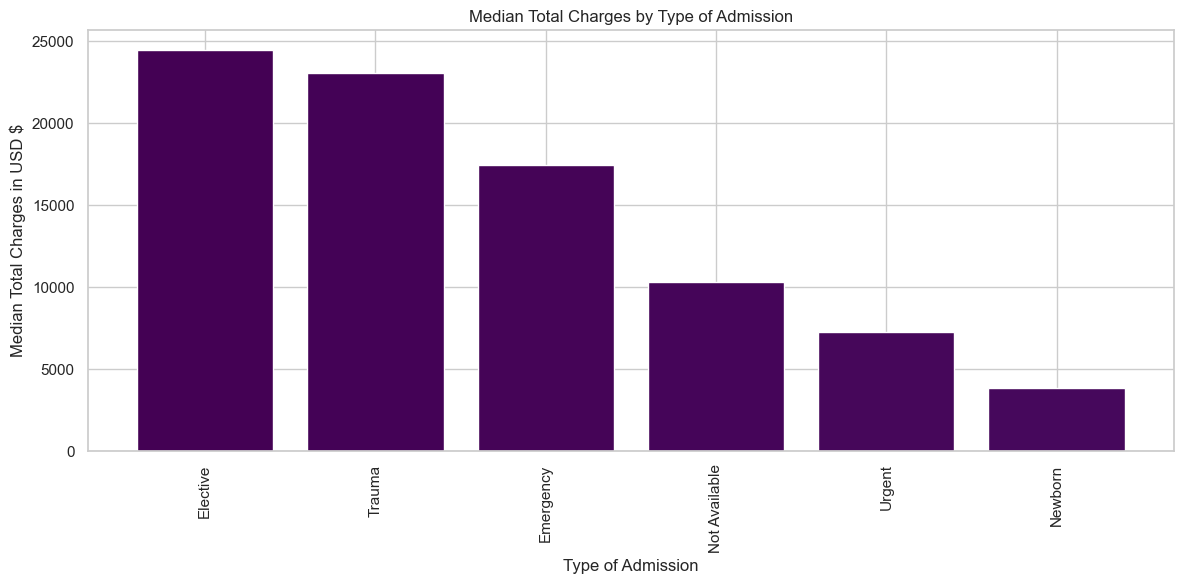

In [152]:
# Group the data by "Hospital Service Area" and calculate the median "Total Charges" for each group
median_charges_by_admission = filtered_df.groupby('Type of Admission')['Total Charges'].median().reset_index()

# Sort the data based on median charges (optional, for better visualization)
median_charges_by_admission = median_charges_by_admission.sort_values('Total Charges', ascending=False)

# Create the bar plot for median charges by hospital service area
colormap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6)) 
plt.bar(median_charges_by_admission['Type of Admission'], median_charges_by_admission['Total Charges'], color=colormap(range(len(median_charges_by_admission))))
plt.xticks(rotation=90)
plt.xlabel('Type of Admission')
plt.ylabel('Median Total Charges in USD $')
plt.title('Median Total Charges by Type of Admission')
plt.tight_layout() 
plt.show()